In [1]:
import numpy as np

from src.environment import Easy21
from src.helpers import  plot_value_function
from src.monte_carlo.monte_carlo_control import monte_carlo_control
from src.monte_carlo.monte_carlo_control import epsilon_greedy_policy as epsilon_greedy_policy1
from src.temporal_difference.td_control import epsilon_greedy_policy, sarsa

In [2]:
N_EPISODES = 1_000_000

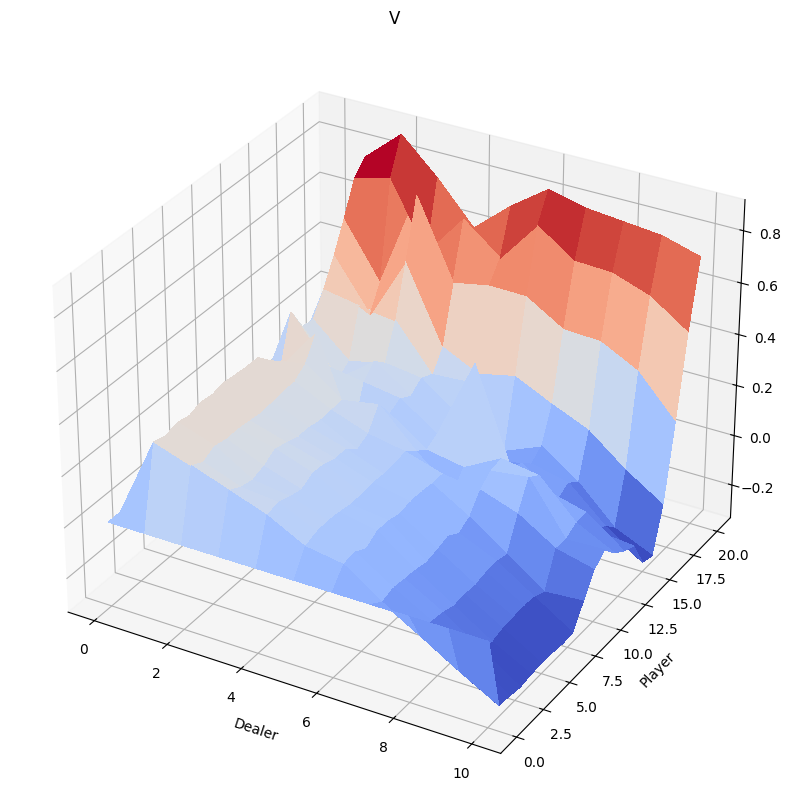

In [3]:
env = Easy21()
Q_star = monte_carlo_control(env=env, policy=epsilon_greedy_policy1, n_episodes=N_EPISODES)
plot_value_function(Q_star, state_action_value_function=True, X_max=11, Y_max=21, figsize=(10,10))

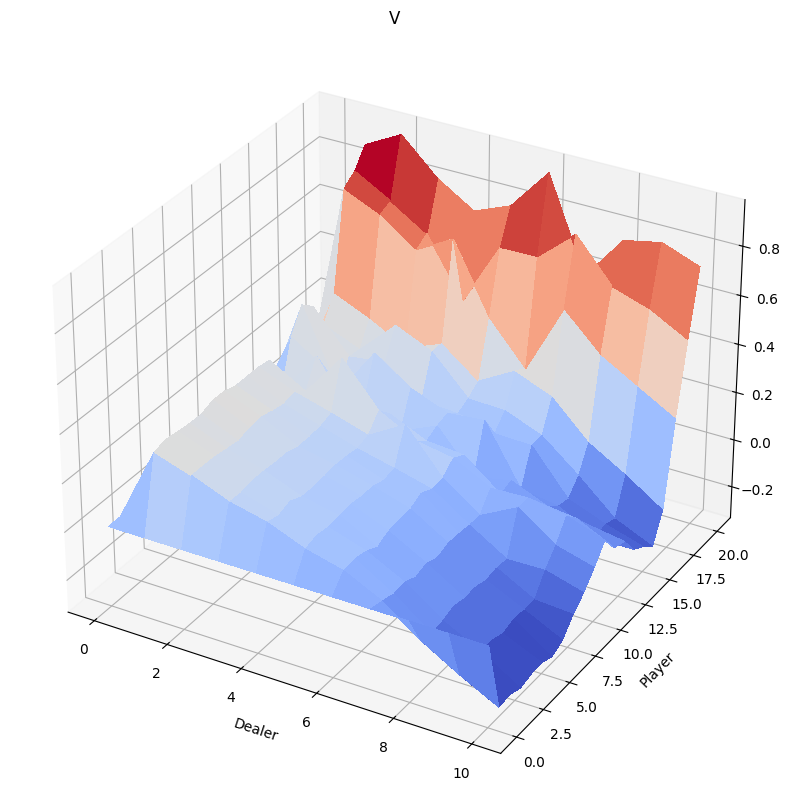

In [4]:
env = Easy21()
Q = sarsa(env=env, policy=epsilon_greedy_policy, lamda=0.3, gamma=0.9, n_episodes=N_EPISODES)

plot_value_function(Q, state_action_value_function=True, X_max=11, Y_max=21, figsize=(10,10))

In [5]:
mse = []
lamdas = [l/10 for l in range(0, 11)]
for lamda in lamdas:
    print('Running lambda: ', lamda)
    Q = sarsa(env=env, policy=epsilon_greedy_policy, lamda=lamda, gamma=1, n_episodes=N_EPISODES)
    diff = Q.max(axis=2) - Q_star.max(axis=2)
    mse.append(np.square(diff).sum()/(10.0*21.0))

Running lambda:  0.0
Running lambda:  0.1
Running lambda:  0.2
Running lambda:  0.3
Running lambda:  0.4
Running lambda:  0.5
Running lambda:  0.6
Running lambda:  0.7
Running lambda:  0.8
Running lambda:  0.9
Running lambda:  1.0


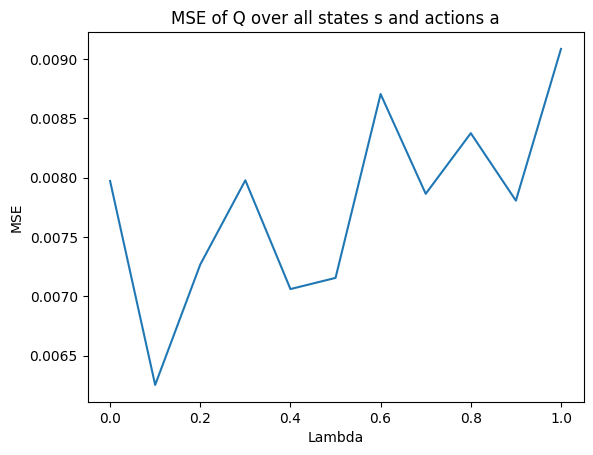

In [6]:
import matplotlib.pyplot as plt

plt.plot(lamdas, mse)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE of Q over all states s and actions a')

plt.show()